# Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft2, fftshift
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Importing Images

In [2]:
SIZE = 256
BATCH_SIZE = 32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Corals",
    shuffle=True,
    image_size = (SIZE,SIZE),
    batch_size = BATCH_SIZE
)

class_names = dataset.class_names
print("Class names:", class_names)
len(dataset)

Found 11219 files belonging to 2 classes.
Class names: ['bleached_corals', 'healthy_corals']


351

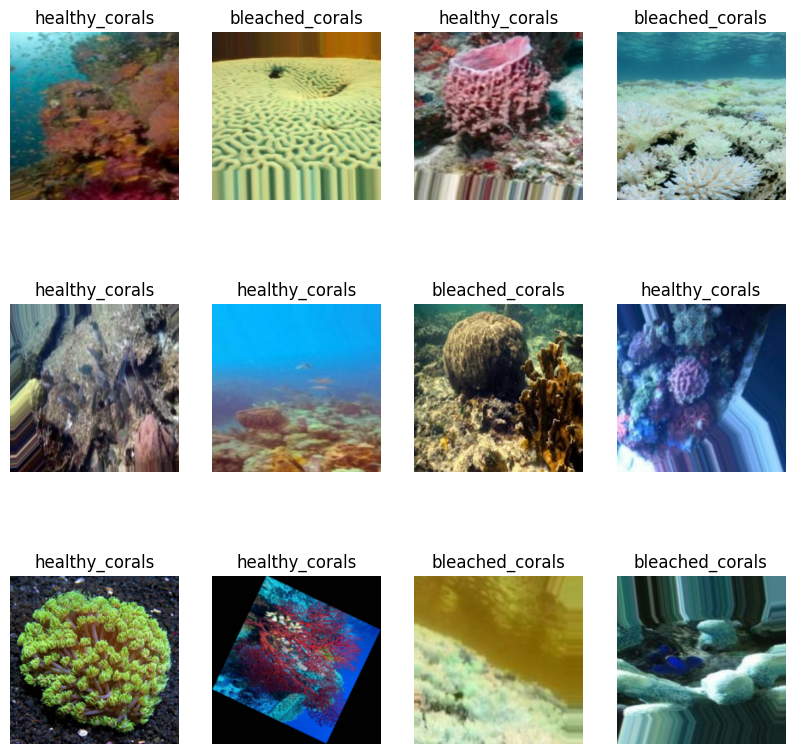

In [3]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
  for i in range(12):
      plt.subplot(3,4,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[label_batch[i]])
      plt.axis("off")

# Magnitude Spectrum

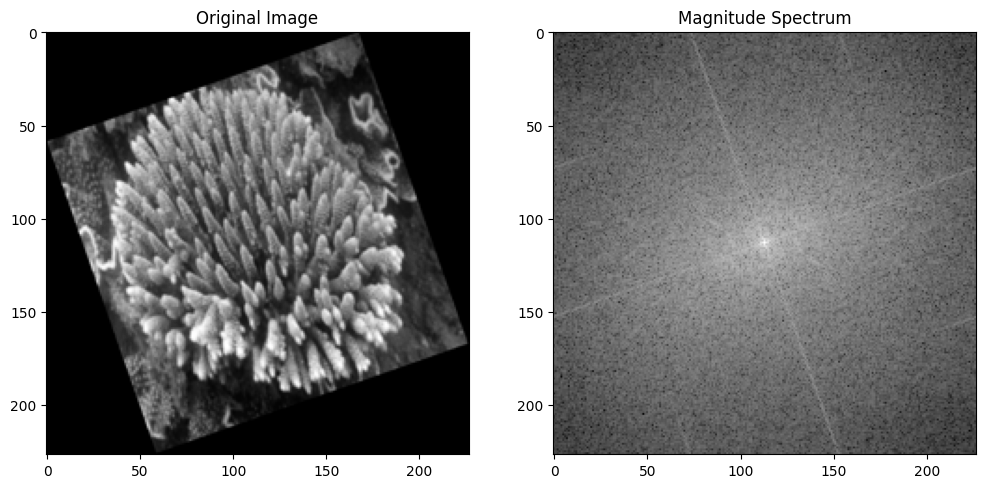

In [4]:
# Load the image (grayscale for simplicity)
from PIL import Image
image = Image.open('1.png').convert('L')
image_array = np.array(image)

# Apply FFT
fft_result = fft2(image_array)
fft_shifted = fftshift(fft_result) 

# Get the magnitude spectrum
magnitude_spectrum = np.log1p(np.abs(fft_shifted))

# Visualize the original image and the magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_array, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

# Fast Fourier Transformation

In [5]:
def compute_fft_features(image):
    if image.ndim == 3:
        image = tf.image.rgb_to_grayscale(image)  
    image_array = image.numpy() 

    # Apply FFT
    fft_result = fft2(image_array)
    fft_shifted = fftshift(fft_result)  # Shift zero-frequency component to the center

    # Compute low and high frequency energy
    low_frequency_energy = np.sum(np.abs(fft_shifted[:image_array.shape[0]//4, :image_array.shape[1]//4]))
    high_frequency_energy = np.sum(np.abs(fft_shifted[image_array.shape[0]//2:, image_array.shape[1]//2:]))
    return low_frequency_energy, high_frequency_energy
    
fft_features = []
labels = []

# Progress tracking
num_batches = len(dataset)
print(f"Total batches to process: {num_batches}")

batch_counter = 0
for images, image_labels in dataset:
    batch_counter += 1
    print(f"Processing batch {batch_counter}/{num_batches}...")

    for i, image in enumerate(images):
        low_freq, high_freq = compute_fft_features(image)
        fft_features.append([low_freq, high_freq])
        labels.append(image_labels[i].numpy())  

    # Print progress for every 100 images processed
    if batch_counter * BATCH_SIZE % 100 == 0:
        print(f"Processed {batch_counter * BATCH_SIZE} images so far...")

fft_features = np.array(fft_features)
labels = np.array(labels)

Total batches to process: 351
Processing batch 1/351...
Processing batch 2/351...
Processing batch 3/351...
Processing batch 4/351...
Processing batch 5/351...
Processing batch 6/351...
Processing batch 7/351...
Processing batch 8/351...
Processing batch 9/351...
Processing batch 10/351...
Processing batch 11/351...
Processing batch 12/351...
Processing batch 13/351...
Processing batch 14/351...
Processing batch 15/351...
Processing batch 16/351...
Processing batch 17/351...
Processing batch 18/351...
Processing batch 19/351...
Processing batch 20/351...
Processing batch 21/351...
Processing batch 22/351...
Processing batch 23/351...
Processing batch 24/351...
Processing batch 25/351...
Processed 800 images so far...
Processing batch 26/351...
Processing batch 27/351...
Processing batch 28/351...
Processing batch 29/351...
Processing batch 30/351...
Processing batch 31/351...
Processing batch 32/351...
Processing batch 33/351...
Processing batch 34/351...
Processing batch 35/351...
Pro

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fft_features, labels, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Example prediction for a new feature vector (for demonstration)
new_fft_features = np.array([[21.5, 7.7]])  # New sample for prediction
prediction = clf.predict(new_fft_features)
res = prediction[0]
res1 = class_names[res]
print("Predicted class for new sample:", res1)

Predicted class for new sample: bleached_corals
